# Analysis for 20230703-090301.xlsx

## 0. Imports

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from ast import literal_eval
from typing import List, Union
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
from scipy import interpolate
import calendar
import ast
from collections import ChainMap
import yaml
plt.style.use('seaborn-whitegrid')

## 1. Read the data

In [2]:
excel_sheet_path = r'C:\python\personal\my-open\notebooks\20230703-090301\data\20230703-090301.xlsx'
data = pd.read_excel(excel_sheet_path, engine='openpyxl')

In [3]:
data.head()

,FolderName,rated_photovoltaic_kilowatts,simulation_time_series_resolution_in_minutes,energy_management_system_time_series_resolution_in_minutes,max_storage_asset_energy_in_kilowatt_hour,min_storage_asset_energy_in_kilowatt_hour,max_storage_asset_active_power_in_kilowatts,min_storage_asset_active_power_in_kilowatts,initial_storage_asset_energy_level_percentage,required_storage_asset_terminal_energy_level_percentage,...,imported_active_power_in_kilowatts,exported_active_power_in_kilowatts,building_power_consumption_in_kilowatts,ambient_temperature_in_degree_celsius,building_internal_temperature_in_celsius_degrees,hvac_active_power_in_kilowatts,storage_asset_accumulated_power_in_kilowatts,storage_asset_charge_or_discharge_power_in_kilowatts,storage_asset_active_power_in_kilowatts,storage_asset_energy_level_in_kilowatt_hour
0,20230703-090332_1_Commercial-275-bed Hospital,400,1,15,500,0,500,0,80,100,...,"[[499.9999999966398], [499.99999999663976], [4...","[[249.28068434823166], [246.71989084925588], [...","[[244.16591564814996], [246.72670914695823], [...","[-3.6851740626763085, -3.9440702927850753, -4....","[20.999999999999634, 21.00000000013551, 21.000...","[244.16591564814996, 244.16591564814996, 244.1...","[244.16591564814996, 246.72670914695823, 252.0...","[2.581697340334497e-10, 4.2562804042116843e-10...","[2.581697340334497e-10, 2.581697340334497e-10,...","[400.0, 400.0000000000043, 400.00000000000864,..."
1,20230703-090401_2_Commercial-275-bed Hospital,400,1,15,500,0,500,0,80,100,...,"[[499.99999998386346], [499.9999999838476], [4...","[[326.7496260351713], [327.44164323212664], [3...","[[166.4211739348836], [165.72915673792656], [1...","[4.174819364103925, 4.244782243962801, 4.10928...","[20.9999999999997, 21.000000000713133, 21.0000...","[166.4211739348836, 166.4211739348836, 166.421...","[166.4211739348836, 165.72915673792656, 167.06...","[1.3808501486502239e-08, 1.3794443091923271e-0...","[1.3808501486502239e-08, 1.3808501486502239e-0...","[400.0, 400.00000000023016, 400.0000000004603,..."
2,20230703-090430_3_Commercial-275-bed Hospital,400,1,15,500,0,500,0,80,100,...,"[[499.9999999412031], [499.99999994118565], [4...","[[407.0975282813537], [410.0311039653256], [40...","[[86.9538716064481], [84.0202959224064], [84.7...","[12.208963769453646, 12.505548100028602, 12.42...","[20.999999999999176, 21.000000002757478, 21.00...","[86.9538716064481, 86.9538716064481, 86.953871...","[86.9538716064481, 84.0202959224064, 84.779456...","[5.340130128463632e-08, 5.345363682979045e-08,...","[5.340130128463632e-08, 5.340130128463632e-08,...","[400.0, 400.00000000089, 400.00000000178, 400...."
3,20230703-090500_4_Commercial-275-bed Hospital,400,1,15,500,0,500,0,80,100,...,"[[499.99999999286166], [499.9999999928591], [4...","[[384.29998688566565], [373.6164212976121], [3...","[[110.2162131025148], [120.89977869054586], [1...","[9.857140880334313, 8.777032376115372, 8.98475...","[20.999999999999478, 21.000000000364544, 21.00...","[110.2162131025148, 110.2162131025148, 110.216...","[110.2162131025148, 120.89977869054586, 118.84...","[4.68116270380545e-09, 4.701168311107587e-09, ...","[4.68116270380545e-09, 4.68116270380545e-09, 4...","[400.0, 400.00000000007805, 400.0000000001561,..."
4,20230703-090530_5_Commercial-275-bed Hospital,400,1,15,500,0,500,0,80,100,...,"[[499.9999999879088], [499.999999987908], [499...","[[418.198829741278], [404.19706230534666], [40...","[[76.04297023491421], [90.04473767082571], [91...","[13.312055782015861, 11.896477041113585, 11.74...","[20.999999999761904, 21.000000000577014, 21.00...","[76.04297023491421, 76.04297023491421, 76.0429...","[76.04297023491421, 90.04473767082571, 91.5328...","[1.171609034745657e-08, 1.1735179770939969e-08...","[1.171609034745657e-08, 1.171609034745657e-08,...","[400.0, 400.00000000019526, 400.0000000003905,..."


In [4]:
data.shape

(72, 69)

In [5]:
data.columns

Index(['FolderName', 'rated_photovoltaic_kilowatts',
       'simulation_time_series_resolution_in_minutes',
       'energy_management_system_time_series_resolution_in_minutes',
       'max_storage_asset_energy_in_kilowatt_hour',
       'min_storage_asset_energy_in_kilowatt_hour',
       'max_storage_asset_active_power_in_kilowatts',
       'min_storage_asset_active_power_in_kilowatts',
       'initial_storage_asset_energy_level_percentage',
       'required_storage_asset_terminal_energy_level_percentage',
       'storage_asset_absolute_active_power_in_kilowatts',
       'storage_asset_degradation_ratio_in_euros_per_kilowatt_hour',
       'storage_asset_charging_efficiency_percentage',
       'storage_asset_charging_efficiency_for_the_optimizer_percentage',
       'max_inside_degree_celsius', 'min_inside_degree_celsius',
       'initial_inside_degree_celsius',
       'max_consumed_electric_heating_kilowatts',
       'max_consumed_electric_cooling_kilowatts',
       'heat_pump_coefficien

## 2.Reformat list columns

The list or array type columns are displayed as string type, let's modify them:

In [6]:
# Format storage_asset_active_power_in_kilowatts column
storage_asset_active_power_in_kilowatts_list = []
for _, row in data.iterrows():
    storage_asset_active_power_in_kilowatts = float(row.storage_asset_active_power_in_kilowatts.split(',')[0].split('[')[1])
    storage_asset_active_power_in_kilowatts_list.append(storage_asset_active_power_in_kilowatts)
data['storage_asset_active_power_in_kilowatts'] = storage_asset_active_power_in_kilowatts_list

In [7]:
for column in data.columns:
    try:
        data[column] = data[column].map(literal_eval)
    except:
        print(f'{column} column not possible to transform')

FolderName column not possible to transform
rated_photovoltaic_kilowatts column not possible to transform
simulation_time_series_resolution_in_minutes column not possible to transform
energy_management_system_time_series_resolution_in_minutes column not possible to transform
max_storage_asset_energy_in_kilowatt_hour column not possible to transform
min_storage_asset_energy_in_kilowatt_hour column not possible to transform
max_storage_asset_active_power_in_kilowatts column not possible to transform
min_storage_asset_active_power_in_kilowatts column not possible to transform
initial_storage_asset_energy_level_percentage column not possible to transform
required_storage_asset_terminal_energy_level_percentage column not possible to transform
storage_asset_absolute_active_power_in_kilowatts column not possible to transform
storage_asset_degradation_ratio_in_euros_per_kilowatt_hour column not possible to transform
storage_asset_charging_efficiency_percentage column not possible to transform


In [8]:
data.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64'), dtype('bool')],
      dtype=object)

Get the columns that have an array like format (array, list, etc.):

In [9]:
list_columns = []
for column in data.columns:
    print(column)
    print(type(column))
    if isinstance(data[column][0], list):
        list_columns.append(column)

FolderName
<class 'str'>
rated_photovoltaic_kilowatts
<class 'str'>
simulation_time_series_resolution_in_minutes
<class 'str'>
energy_management_system_time_series_resolution_in_minutes
<class 'str'>
max_storage_asset_energy_in_kilowatt_hour
<class 'str'>
min_storage_asset_energy_in_kilowatt_hour
<class 'str'>
max_storage_asset_active_power_in_kilowatts
<class 'str'>
min_storage_asset_active_power_in_kilowatts
<class 'str'>
initial_storage_asset_energy_level_percentage
<class 'str'>
required_storage_asset_terminal_energy_level_percentage
<class 'str'>
storage_asset_absolute_active_power_in_kilowatts
<class 'str'>
storage_asset_degradation_ratio_in_euros_per_kilowatt_hour
<class 'str'>
storage_asset_charging_efficiency_percentage
<class 'str'>
storage_asset_charging_efficiency_for_the_optimizer_percentage
<class 'str'>
max_inside_degree_celsius
<class 'str'>
min_inside_degree_celsius
<class 'str'>
initial_inside_degree_celsius
<class 'str'>
max_consumed_electric_heating_kilowatts
<class

Check the list column lengths:

In [10]:
for list_column in list_columns:
    print(f'{list_column} length: {len(data[list_column])}')

market_active_power_in_kilowatts length: 72
market_reactive_power_in_kilovolt_ampere_reactive length: 72
active_power_demand_in_kilowatts length: 72
active_power_demand_base_in_kilowatts length: 72
imported_active_power_in_kilowatts length: 72
exported_active_power_in_kilowatts length: 72
building_power_consumption_in_kilowatts length: 72
ambient_temperature_in_degree_celsius length: 72
building_internal_temperature_in_celsius_degrees length: 72
hvac_active_power_in_kilowatts length: 72
storage_asset_accumulated_power_in_kilowatts length: 72
storage_asset_charge_or_discharge_power_in_kilowatts length: 72
storage_asset_energy_level_in_kilowatt_hour length: 72


## 3.Plots

### 3.1. Base Demand vs Imports plot

Plot created as it appears in the original OPEN paper like this.

In [11]:
simulation_time_series_resolution_in_hours = data.simulation_time_series_resolution_in_minutes[0] / 60
hours_per_day = 24
number_of_time_intervals_per_day = int(hours_per_day / simulation_time_series_resolution_in_hours)

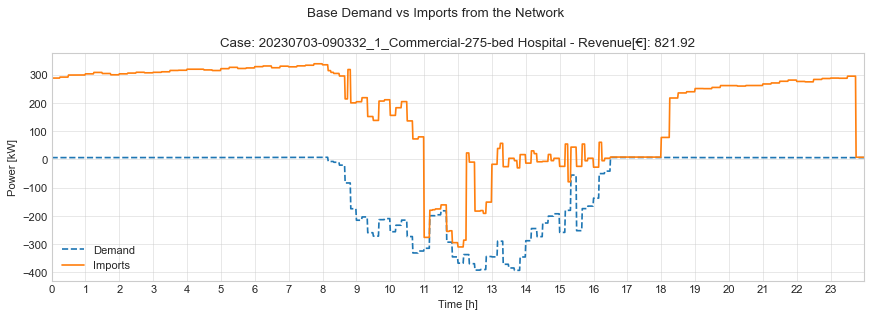

In [12]:
hours = simulation_time_series_resolution_in_hours * np.arange(number_of_time_intervals_per_day)
max_time = max(hours)
figure = plt.figure(num=None, figsize=(11, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(hours, data.active_power_demand_base_in_kilowatts[0], '--', label='Demand')
plt.plot(hours, data.market_active_power_in_kilowatts[0], label='Imports')
plt.suptitle('Base Demand vs Imports from the Network')
subtitle = 'Case: ' + str(data.FolderName[0]) + ' - ' + 'Revenue[€]: ' + str(data.revenue[0])
plt.title(subtitle)
plt.ylabel('Power [kW]')
plt.xlabel('Time [h]')
plt.xlim(0, max_time)
plt.xticks(np.arange(0, max_time, step=1))
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()

### 3.2. Plot and save the list-array like data

In [13]:
number_of_rows = data.shape[0]
number_of_rows

72

In [14]:
number_of_columns = data.shape[1]
number_of_plots = number_of_rows * number_of_columns

In [15]:
list_columns

['market_active_power_in_kilowatts',
 'market_reactive_power_in_kilovolt_ampere_reactive',
 'active_power_demand_in_kilowatts',
 'active_power_demand_base_in_kilowatts',
 'imported_active_power_in_kilowatts',
 'exported_active_power_in_kilowatts',
 'building_power_consumption_in_kilowatts',
 'ambient_temperature_in_degree_celsius',
 'building_internal_temperature_in_celsius_degrees',
 'hvac_active_power_in_kilowatts',
 'storage_asset_accumulated_power_in_kilowatts',
 'storage_asset_charge_or_discharge_power_in_kilowatts',
 'storage_asset_energy_level_in_kilowatt_hour']

In [16]:
formatting_dict = {'market_active_power_in_kilowatts': 
                   {'name': 'Market Active Power',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                   'market_reactive_power_in_kilovolt_ampere_reactive': 
                   {'name': 'Market Reactive Power',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Reactive Power [kVA]'},
                   'active_power_demand_in_kilowatts': 
                   {'name': 'Solar PV generation',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                    'active_power_demand_base_in_kilowatts': 
                   {'name': 'Solar PV generation',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                    'imported_active_power_in_kilowatts': 
                   {'name': 'Imported Active Power',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                    'exported_active_power_in_kilowatts': 
                   {'name': 'Exported Active Power',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                    'building_power_consumption_in_kilowatts': 
                   {'name': 'Building Electrical Consumption',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                   'ambient_temperature_in_degree_celsius': 
                   {'name': 'Ambient Temperature',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Temperature [°C]'},
                   'building_internal_temperature_in_celsius_degrees': 
                   {'name': 'Building Internal Temperature',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Temperature [°C]',
                   'max_temperature_inside': 25,
                   'min_temperature_inside': 21},
                    'hvac_active_power_in_kilowatts': 
                   {'name': 'HVAC consumption',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                    'storage_asset_accumulated_power_in_kilowatts': 
                   {'name': 'Stored Power',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                    'storage_asset_charge_or_discharge_power_in_kilowatts': 
                   {'name': 'Storage Asset System Charged and Discharged Power',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]'},
                    'storage_asset_energy_level_in_kilowatt_hour': 
                   {'name': 'Storage Asset Energy Level',
                   'x_axis_name': 'Time [Hours]',
                   'y_axis_name': 'Active Power [kW]',
                   'min_y_axis_value': 0}
                   
                  }
                   

Save the plots in PDF format:

In [17]:
# To avoid having to run the following cell every time
save_plots_in_pdf = False

In [18]:
%%time
if save_plots_in_pdf is True:
    hours_per_day = 24
    for number_of_row in np.arange(0, number_of_rows):
        row_data = data.iloc[number_of_row]
        figure = plt.figure(num=None, figsize=(15, 30), dpi=80, facecolor='w', edgecolor='k')
        amount_of_subplots = len(list_columns)
        for list_column_index in np.arange(0, amount_of_subplots):
            list_column = list_columns[list_column_index]
            formatting_parameters = formatting_dict[list_column]
            column_data = row_data[list_column]
            data_length = len(column_data)
            resolution = hours_per_day / data_length 
            hours_per_resolution = np.arange(start=0, stop=hours_per_day, step=resolution)
            plt.subplot(amount_of_subplots, 1, list_column_index + 1)
            plt.plot(hours_per_resolution, column_data)
            if 'max_temperature_inside' in formatting_parameters:
                max_temperature_inside_array = np.full(shape=hours_per_resolution.shape, 
                                                       fill_value=formatting_parameters['max_temperature_inside'])
                plt.plot(hours_per_resolution, max_temperature_inside_array, color='red', linestyle='--',
                        label='Maximum')
            if 'min_temperature_inside' in formatting_parameters:
                min_temperature_inside_array = np.full(shape=hours_per_resolution.shape, 
                                                       fill_value=formatting_parameters['min_temperature_inside'])
                plt.plot(hours_per_resolution, min_temperature_inside_array, color='red', linestyle='--',
                        label='Minimum')
            case_name = row_data['FolderName']
            splitted_case_name = case_name.split('_')
            month_number = int(splitted_case_name[1])
            month_name = calendar.month_name[month_number]
            plot_title = splitted_case_name[2]
            name = formatting_parameters['name']
            plt.title(f'{plot_title} - {name} ({month_name})')
            plt.grid(True, alpha=0.5)
            plt.xticks(np.arange(0, hours_per_resolution[-1] + 1, step=1))
            plt.xlabel(formatting_parameters['x_axis_name'])
            plt.ylabel(formatting_parameters['y_axis_name'])
            if 'min_y_axis_value' in formatting_parameters:
                max_y = np.max(column_data) + 100
                plt.ylim(0, )
            if 'min_temperature_inside' in formatting_parameters:
                plt.legend()
            figure.tight_layout()
        pp = PdfPages(f'plots/{case_name}.pdf')
        pp.savefig()
        pp.close()
        plt.close(figure)

CPU times: total: 0 ns
Wall time: 0 ns


In [19]:
number_of_plots = len(os.listdir('plots'))
print('number_of_plots:', number_of_plots)

number_of_plots: 73


### 3.3. Format the plots

In [20]:
test_data = data.iloc[0]
test_data

FolderName                                                        20230703-090332_1_Commercial-275-bed Hospital
rated_photovoltaic_kilowatts                                                                                400
simulation_time_series_resolution_in_minutes                                                                  1
energy_management_system_time_series_resolution_in_minutes                                                   15
max_storage_asset_energy_in_kilowatt_hour                                                                   500
                                                                                    ...                        
hvac_active_power_in_kilowatts                                [244.16591564814996, 244.16591564814996, 244.1...
storage_asset_accumulated_power_in_kilowatts                  [244.16591564814996, 246.72670914695823, 252.0...
storage_asset_charge_or_discharge_power_in_kilowatts          [2.581697340334497e-10, 4.2562804042116843

In [21]:
type((test_data['active_power_demand_base_in_kilowatts']))


list

In [22]:
def plot_demand_base_and_total_imported_power(simulation_time_series_resolution_in_hours: float,
                                              number_of_time_intervals_per_day: int,
                                              active_power_demand_base_in_kilowatts: np.ndarray,
                                              market_active_power_in_kilowatts: np.ndarray, case: str,
                                              revenue: float, current_time: str, plots_path: Union[str, None],
                                              save_plot: bool) -> None:
    hours = simulation_time_series_resolution_in_hours * np.arange(number_of_time_intervals_per_day)
    max_time = max(hours)
    figure = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(hours, active_power_demand_base_in_kilowatts, '--', label='Demand')
    plt.plot(hours, market_active_power_in_kilowatts, label='Imports')
    plt.suptitle('Base Demand vs Imports from the Network')
    subtitle = 'Case: ' + str(case) + ' - ' + 'Revenue[€]: ' + str(revenue)
    plt.title(subtitle)
    plt.ylabel('Power [kW]')
    plt.xlabel('Time [h]')
    plt.xlim(0, max_time)
    plt.xticks(np.arange(0, max_time, step=1))
    plt.legend()
    plt.grid(True, alpha=0.5)
    plt.tight_layout()
    if save_plot:
        figure.savefig(f'{plots_path}/{current_time}_{case}_demand_base_and_total_imported_power.png')
    else:
        plt.show()

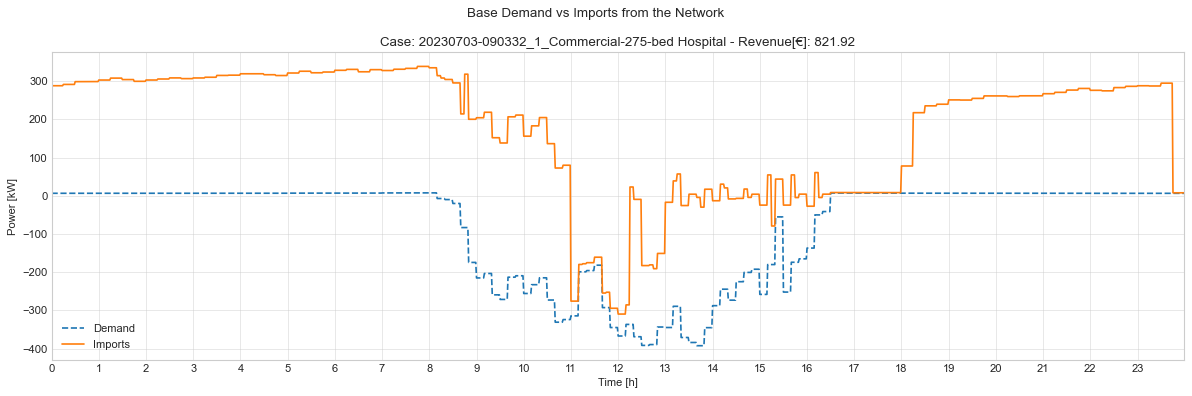

In [23]:
hours_per_day = 24
simulation_time_series_resolution_in_minutes = test_data['simulation_time_series_resolution_in_minutes']
simulation_time_series_resolution_in_hours = simulation_time_series_resolution_in_minutes / 60
number_of_time_intervals_per_day = int(hours_per_day / simulation_time_series_resolution_in_hours)
active_power_demand_base_in_kilowatts = test_data['active_power_demand_base_in_kilowatts']
market_active_power_in_kilowatts = test_data['market_active_power_in_kilowatts']
case = test_data['FolderName']
revenue = test_data['revenue']
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
plots_path = None
save_plot = False


plot_demand_base_and_total_imported_power(
    simulation_time_series_resolution_in_hours=simulation_time_series_resolution_in_hours,
    number_of_time_intervals_per_day=number_of_time_intervals_per_day,
    active_power_demand_base_in_kilowatts=active_power_demand_base_in_kilowatts,
    market_active_power_in_kilowatts=market_active_power_in_kilowatts,
    case=case,
    revenue=revenue,
    current_time=current_time,
    plots_path=plots_path,
    save_plot=save_plot
)

In [24]:
list_columns

['market_active_power_in_kilowatts',
 'market_reactive_power_in_kilovolt_ampere_reactive',
 'active_power_demand_in_kilowatts',
 'active_power_demand_base_in_kilowatts',
 'imported_active_power_in_kilowatts',
 'exported_active_power_in_kilowatts',
 'building_power_consumption_in_kilowatts',
 'ambient_temperature_in_degree_celsius',
 'building_internal_temperature_in_celsius_degrees',
 'hvac_active_power_in_kilowatts',
 'storage_asset_accumulated_power_in_kilowatts',
 'storage_asset_charge_or_discharge_power_in_kilowatts',
 'storage_asset_energy_level_in_kilowatt_hour']

In [25]:
data_length = len(test_data['imported_active_power_in_kilowatts'])
simulation_time_series_resolution_in_hours = hours_per_day / data_length
print(number_of_time_intervals_per_day)
new_hours = np.arange(start=0, stop=hours_per_day , step=simulation_time_series_resolution_in_hours)

1440


In [26]:
len(new_hours)

96

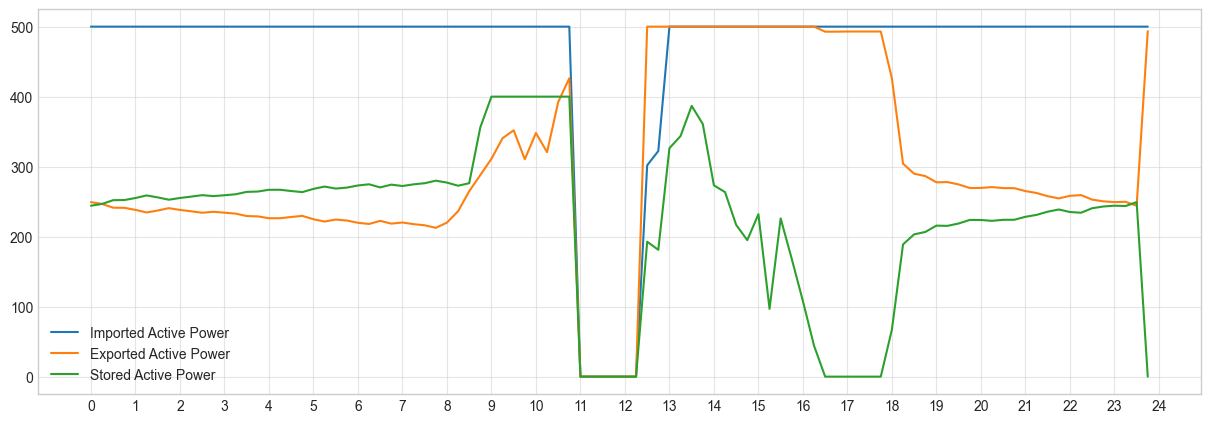

In [27]:
figure = plt.figure(figsize=(15, 5))
plt.plot(new_hours, test_data['imported_active_power_in_kilowatts'], label='Imported Active Power')
plt.plot(new_hours, test_data['exported_active_power_in_kilowatts'], label='Exported Active Power')
plt.plot(new_hours, test_data['building_power_consumption_in_kilowatts'], label='Stored Active Power')
plt.xticks(np.arange(0, new_hours[-1] + 1, step=1))
plt.grid(True, alpha=0.5)
plt.legend()

In [28]:
def downsample_array_with_average_values(array_to_resample: np.array, resample_length: int) -> np.array:
    array_to_resample_length = len(array_to_resample)
    batch_size = int(array_to_resample_length / resample_length)
    average_list = []
    for index in np.arange(start=0, stop=array_to_resample_length, step=batch_size):
        average_value = np.mean(array_to_resample[index: index+batch_size])
        average_list.append(average_value)
    return np.array(average_list[:resample_length])

In [29]:
array_to_resample = np.array(test_data['active_power_demand_base_in_kilowatts'])
resample_length = len(test_data['imported_active_power_in_kilowatts'])
resampled_active_power_demand_base_in_kilowatts = downsample_array_with_average_values(array_to_resample=array_to_resample, resample_length=resample_length)


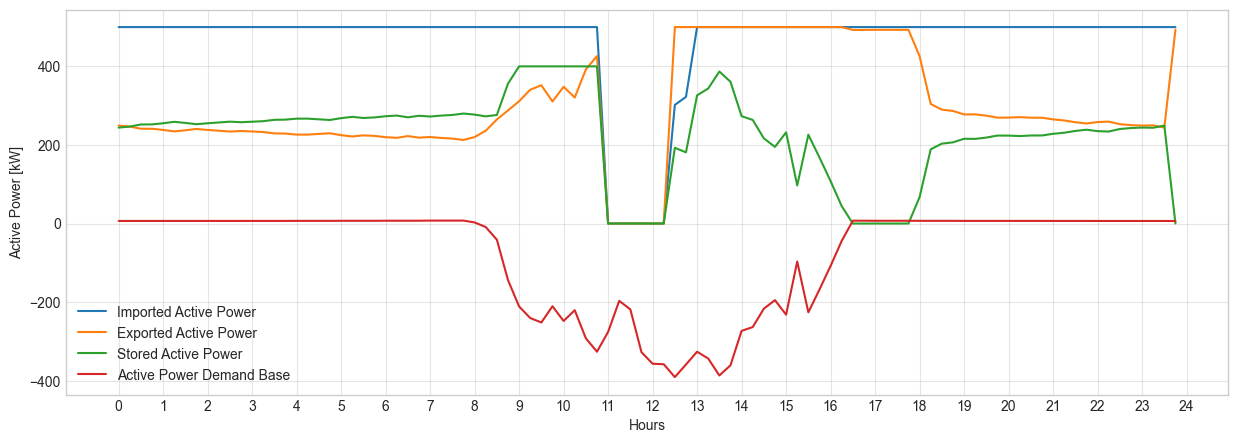

In [30]:
figure = plt.figure(figsize=(15, 5))
plt.plot(new_hours, test_data['imported_active_power_in_kilowatts'], label='Imported Active Power')
plt.plot(new_hours, test_data['exported_active_power_in_kilowatts'], label='Exported Active Power')
plt.plot(new_hours, test_data['building_power_consumption_in_kilowatts'], label='Stored Active Power')
plt.plot(new_hours, resampled_active_power_demand_base_in_kilowatts, label='Active Power Demand Base')
plt.xticks(np.arange(0, new_hours[-1] + 1, step=1))
plt.xlabel('Hours')
plt.ylabel('Active Power [kW]')
plt.grid(True, alpha=0.5)
plt.legend();

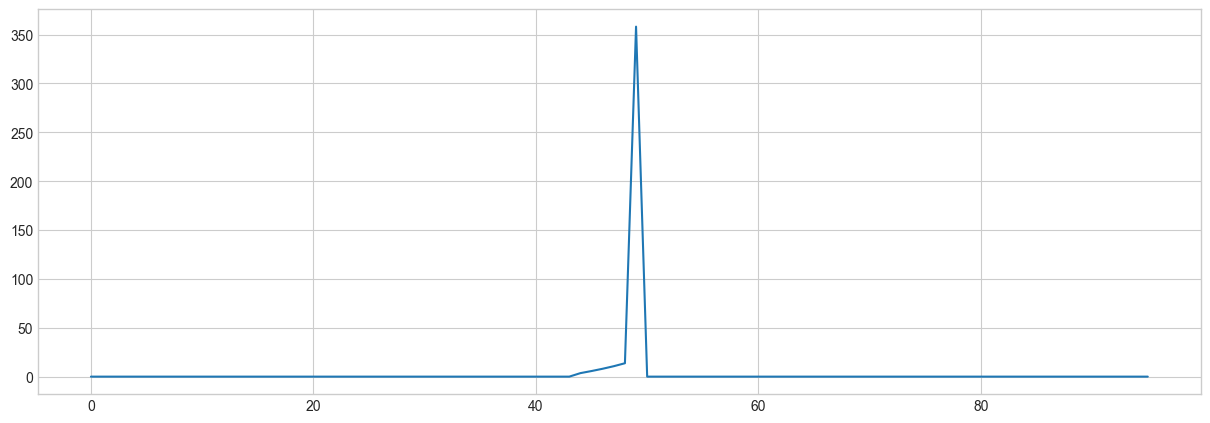

In [31]:
figure = plt.figure(figsize=(15, 5))

plt.plot(data['storage_asset_charge_or_discharge_power_in_kilowatts'][0])

## 4. Economic results

### 4.1. Format the columns for better display

In [32]:
data[['FirstString','MonthNumber', 'Case']] = data['FolderName'].str.split('_', expand=True)


In [33]:
data['MonthNumber'][0]

'1'

In [34]:
data['Month'] = [calendar.month_name[int(month_number)] for month_number in data['MonthNumber']]

In [35]:
data.rename(columns={'revenue': 'Revenue [€]'}, inplace=True);

In [36]:
economic_results = data[['Month', 'Case', 'Revenue [€]']]
economic_results

,Month,Case,Revenue [€]
0,January,Commercial-275-bed Hospital,821.92
1,February,Commercial-275-bed Hospital,567.44
2,March,Commercial-275-bed Hospital,72.71
3,April,Commercial-275-bed Hospital,243.71
4,May,Commercial-275-bed Hospital,-51.88
...,...,...,...
67,August,Reference-Office,-54.89
68,September,Reference-Office,-34.49
69,October,Reference-Office,284.01
70,November,Reference-Office,513.77


In [37]:
path = 'C:/python/personal/my-open/notebooks/20230703-090301/excels'
file_name = 'economic_results.xlsx'
path_file_name = f'{path}/{file_name}'
economic_results.to_excel(path_file_name)

## 4.2. Group by case

### 4.2.1. By Case

In [38]:
economic_results.groupby(by=['Case']).sum().sort_values(by='Case')

,Revenue [€]
Case,
Commercial-275-bed Hospital,3133.46
Commercial-450-bed Hospital,3625.43
Commercial-Office,2911.60
Reference-Hospital,2880.35
Reference-Hotel,2866.53
Reference-Office,2894.67


In [39]:
economic_results.groupby(by=['Case']).mean().sort_values(by='Case')

,Revenue [€]
Case,
Commercial-275-bed Hospital,261.121667
Commercial-450-bed Hospital,302.119167
Commercial-Office,242.633333
Reference-Hospital,240.029167
Reference-Hotel,238.877500
Reference-Office,241.222500


In [40]:
economic_results.loc[economic_results.groupby('Case')['Revenue [€]'].idxmax()].sort_values('Case')

,Month,Case,Revenue [€]
0,January,Commercial-275-bed Hospital,821.92
12,January,Commercial-450-bed Hospital,864.39
24,January,Commercial-Office,796.66
36,January,Reference-Hospital,790.56
48,January,Reference-Hotel,792.59
60,January,Reference-Office,790.55


In [41]:
economic_results.loc[economic_results.groupby('Case')['Revenue [€]'].idxmin()].sort_values('Case')

,Month,Case,Revenue [€]
5,June,Commercial-275-bed Hospital,-82.56
17,June,Commercial-450-bed Hospital,-37.57
29,June,Commercial-Office,-100.29
41,June,Reference-Hospital,-102.94
53,June,Reference-Hotel,-104.74
65,June,Reference-Office,-100.20


### 4.2.2. By Month

In [42]:
economic_results.groupby(by='Month').mean().sort_values(by='Revenue [€]')

,Revenue [€]
Month,
June,-88.050000
May,-52.096667
August,-42.493333
September,-20.110000
July,-16.780000
March,68.961667
April,237.918333
October,292.408333
November,522.486667


In [43]:
economic_results.groupby(by='Month').max().sort_values(by='Revenue [€]')['Revenue [€]']

Month
June         -37.57
May           -8.36
August         4.17
September     28.10
July          30.24
March        105.09
April        289.05
October      339.17
November     571.15
February     601.76
December     838.24
January      864.39
Name: Revenue [€], dtype: float64

In [44]:
economic_results.groupby(by='Month').min().sort_values(by='Revenue [€]')['Revenue [€]']

Month
June        -104.74
May          -66.11
August       -58.90
July         -35.18
September    -34.49
March         56.35
April        220.06
October      275.97
November     503.93
February     537.55
December     764.64
January      790.55
Name: Revenue [€], dtype: float64

## 4.3. Plot the revenue evolution per case 

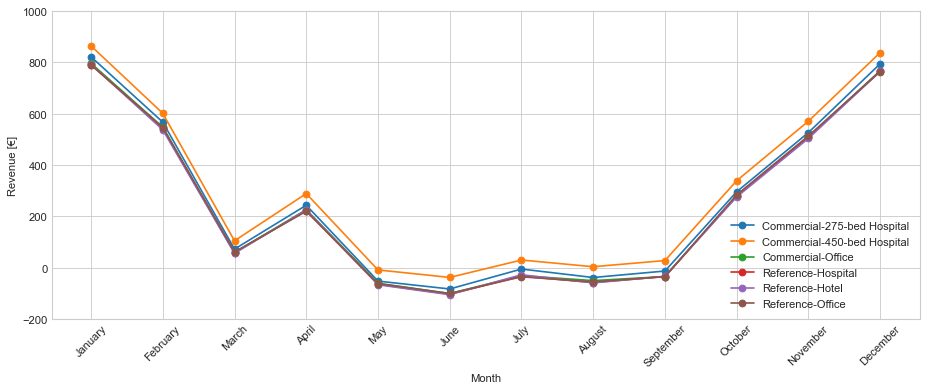

In [45]:
cases = economic_results['Case'].unique()
figure = plt.figure(num=None, figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
for case in cases:
    specific_economic_results = economic_results[economic_results['Case'] == case]
    plt.plot(specific_economic_results['Month'], specific_economic_results['Revenue [€]'], label=case, marker='o')
    plt.xticks(rotation=45)
    plt.xlabel('Month')
    plt.ylabel('Revenue [€]')
    plt.ylim(-200, 1000)
    plt.legend()

# 5. Plot the electric loads

## 5.1. Get the data

In [46]:
electric_loads_path = 'C:/python/personal/my-open/data/electric_loads/considered_building_types'

In [47]:
electric_load_csv_files = os.listdir(electric_loads_path)
electric_load_csv_files

['Commercial-275-bed Hospital.csv',
 'Commercial-450-bed Hospital.csv',
 'Commercial-Office.csv',
 'Reference-Hospital.csv',
 'Reference-Hotel.csv',
 'Reference-Office.csv']

In [48]:
csv_series_list = []
for electric_load_csv_file in electric_load_csv_files:
    electric_load_file_path = f'{electric_loads_path}/{electric_load_csv_file}'
    case = electric_load_csv_file.split('.')[0]
    csv_df = pd.read_csv(electric_load_file_path)
    csv_df.rename(columns={'Power [kW]' : case}, inplace=True)
    csv_series = csv_df[case].to_list()
    csv_series_dict = {case: csv_series}
    csv_series_list.append(csv_series_dict)
    
csv_series_list_dict = dict(ChainMap(*csv_series_list))

In [49]:
electric_loads_df_in_kilowatts = pd.DataFrame(csv_series_list_dict)

In [50]:
electric_loads_df_in_kilowatts

,Reference-Office,Reference-Hotel,Reference-Hospital,Commercial-Office,Commercial-450-bed Hospital,Commercial-275-bed Hospital
0,72.44,80.34,47.69,209.0,2140.3,890.40
1,67.27,79.65,45.34,211.1,2130.7,899.85
2,77.65,32.43,44.64,211.1,2119.3,898.80
3,66.06,31.46,42.04,211.8,2118.9,911.19
4,83.38,43.87,68.04,210.3,2128.6,915.81
...,...,...,...,...,...,...
8755,70.27,469.51,202.89,215.8,2239.9,1012.41
8756,128.09,519.08,173.42,211.8,2196.6,1021.86
8757,134.66,457.89,168.54,213.4,2173.9,996.24
8758,103.87,344.22,136.53,214.2,2151.7,985.74


In [51]:
electric_loads_df_in_kilowatts

,Reference-Office,Reference-Hotel,Reference-Hospital,Commercial-Office,Commercial-450-bed Hospital,Commercial-275-bed Hospital
0,72.44,80.34,47.69,209.0,2140.3,890.40
1,67.27,79.65,45.34,211.1,2130.7,899.85
2,77.65,32.43,44.64,211.1,2119.3,898.80
3,66.06,31.46,42.04,211.8,2118.9,911.19
4,83.38,43.87,68.04,210.3,2128.6,915.81
...,...,...,...,...,...,...
8755,70.27,469.51,202.89,215.8,2239.9,1012.41
8756,128.09,519.08,173.42,211.8,2196.6,1021.86
8757,134.66,457.89,168.54,213.4,2173.9,996.24
8758,103.87,344.22,136.53,214.2,2151.7,985.74


## 5.2. Plot the data for the year

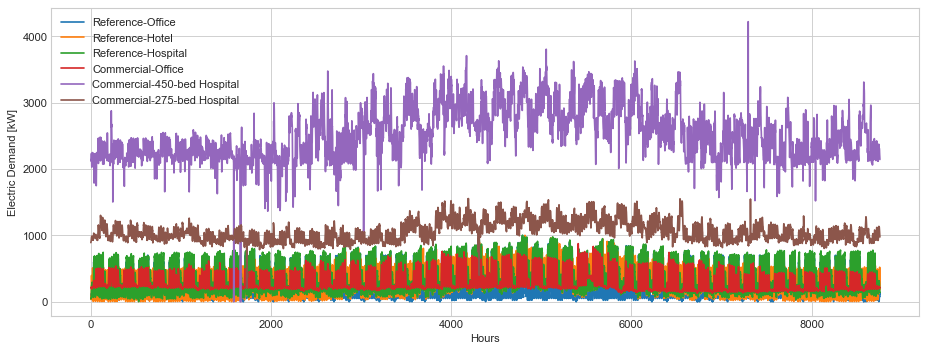

In [52]:
figure = plt.figure(num=None, figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
for column in electric_loads_df_in_kilowatts.columns:
    plt.plot(electric_loads_df_in_kilowatts[column], label=column)
    plt.xlabel('Hours')
    plt.ylabel('Electric Demand [kW]')
    plt.legend()

In [53]:
hotel_or_hospital_hvac_percentage = 40
office_hvac_percentage = 60

In [54]:
hvac_loads_df_in_kilowwats = electric_loads_df_in_kilowatts.copy()
for column in hvac_loads_df_in_kilowwats.columns:
    if 'Office' in column:
        hvac_loads_df_in_kilowwats[column] = office_hvac_percentage * hvac_loads_df_in_kilowwats[column]
    elif 'Hotel' or 'Hospital' in column:
         hvac_loads_df_in_kilowwats[column] = hotel_or_hospital_hvac_percentage * hvac_loads_df_in_kilowwats[column]
    else:
        print('Substring not in column name')

In [55]:
hvac_loads_df_in_kilowwats

,Reference-Office,Reference-Hotel,Reference-Hospital,Commercial-Office,Commercial-450-bed Hospital,Commercial-275-bed Hospital
0,4346.4,3213.6,1907.6,12540.0,85612.0,35616.0
1,4036.2,3186.0,1813.6,12666.0,85228.0,35994.0
2,4659.0,1297.2,1785.6,12666.0,84772.0,35952.0
3,3963.6,1258.4,1681.6,12708.0,84756.0,36447.6
4,5002.8,1754.8,2721.6,12618.0,85144.0,36632.4
...,...,...,...,...,...,...
8755,4216.2,18780.4,8115.6,12948.0,89596.0,40496.4
8756,7685.4,20763.2,6936.8,12708.0,87864.0,40874.4
8757,8079.6,18315.6,6741.6,12804.0,86956.0,39849.6
8758,6232.2,13768.8,5461.2,12852.0,86068.0,39429.6


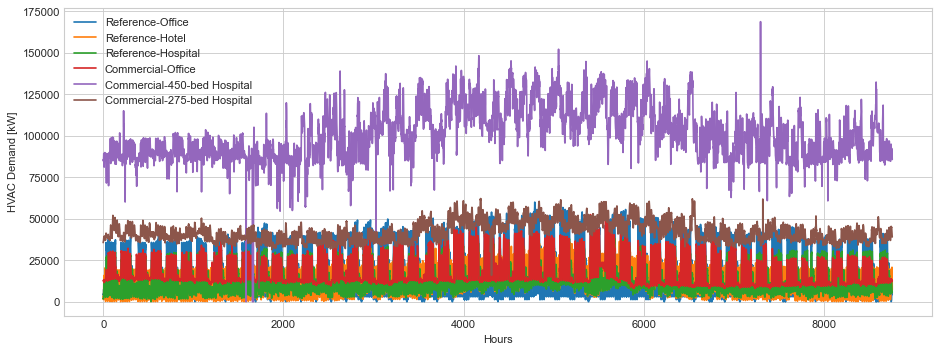

In [56]:
figure = plt.figure(num=None, figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
for column in electric_loads_df_in_kilowatts.columns:
    plt.plot(hvac_loads_df_in_kilowwats[column], label=column)
    plt.xlabel('Hours')
    plt.ylabel('HVAC Demand [kW]')
    plt.legend()

## 5.3. Group the data

### 5.3.1. Prepare the data

In [57]:
def get_days_from_hours(hours: pd.Series) -> pd.Series:
    days = []
    for hour in hours.values:
        hours_per_day = 24
        day = int(hour / hours_per_day)
        days.append(day)
    return pd.Series(days)

In [58]:
hours = electric_loads_df_in_kilowatts.index
electric_loads_df_in_kilowatts['Day'] = get_days_from_hours(hours=hours)
electric_loads_df_in_kilowatts['Date'] = pd.to_datetime(electric_loads_df_in_kilowatts.Day, unit='D')
electric_loads_df_in_kilowatts['Month'] = electric_loads_df_in_kilowatts['Date'].dt.month

electric_loads_df_in_kilowatts

,Reference-Office,Reference-Hotel,Reference-Hospital,Commercial-Office,Commercial-450-bed Hospital,Commercial-275-bed Hospital,Day,Date,Month
0,72.44,80.34,47.69,209.0,2140.3,890.40,0,1970-01-01,1
1,67.27,79.65,45.34,211.1,2130.7,899.85,0,1970-01-01,1
2,77.65,32.43,44.64,211.1,2119.3,898.80,0,1970-01-01,1
3,66.06,31.46,42.04,211.8,2118.9,911.19,0,1970-01-01,1
4,83.38,43.87,68.04,210.3,2128.6,915.81,0,1970-01-01,1
...,...,...,...,...,...,...,...,...,...
8755,70.27,469.51,202.89,215.8,2239.9,1012.41,364,1970-12-31,12
8756,128.09,519.08,173.42,211.8,2196.6,1021.86,364,1970-12-31,12
8757,134.66,457.89,168.54,213.4,2173.9,996.24,364,1970-12-31,12
8758,103.87,344.22,136.53,214.2,2151.7,985.74,364,1970-12-31,12


In [59]:
hours = hvac_loads_df_in_kilowwats.index
hvac_loads_df_in_kilowwats['Day'] = get_days_from_hours(hours=hours)
hvac_loads_df_in_kilowwats['Date'] = pd.to_datetime(hvac_loads_df_in_kilowwats.Day, unit='D')
hvac_loads_df_in_kilowwats['Month'] = hvac_loads_df_in_kilowwats['Date'].dt.month
hvac_loads_df_in_kilowwats

,Reference-Office,Reference-Hotel,Reference-Hospital,Commercial-Office,Commercial-450-bed Hospital,Commercial-275-bed Hospital,Day,Date,Month
0,4346.4,3213.6,1907.6,12540.0,85612.0,35616.0,0,1970-01-01,1
1,4036.2,3186.0,1813.6,12666.0,85228.0,35994.0,0,1970-01-01,1
2,4659.0,1297.2,1785.6,12666.0,84772.0,35952.0,0,1970-01-01,1
3,3963.6,1258.4,1681.6,12708.0,84756.0,36447.6,0,1970-01-01,1
4,5002.8,1754.8,2721.6,12618.0,85144.0,36632.4,0,1970-01-01,1
...,...,...,...,...,...,...,...,...,...
8755,4216.2,18780.4,8115.6,12948.0,89596.0,40496.4,364,1970-12-31,12
8756,7685.4,20763.2,6936.8,12708.0,87864.0,40874.4,364,1970-12-31,12
8757,8079.6,18315.6,6741.6,12804.0,86956.0,39849.6,364,1970-12-31,12
8758,6232.2,13768.8,5461.2,12852.0,86068.0,39429.6,364,1970-12-31,12


### 5.3.2. Get the groupped data

In [60]:
groupped_by_month_electric_loads_df_in_kilowatts = electric_loads_df_in_kilowatts.groupby('Month').sum()
groupped_by_month_electric_loads_df_in_kilowatts = groupped_by_month_electric_loads_df_in_kilowatts.loc[:, groupped_by_month_electric_loads_df_in_kilowatts.columns != 'Day']
groupped_by_month_electric_loads_df_in_megawatts = groupped_by_month_electric_loads_df_in_kilowatts / 1000
groupped_by_month_electric_loads_df_in_megawatts

,Reference-Office,Reference-Hotel,Reference-Hospital,Commercial-Office,Commercial-450-bed Hospital,Commercial-275-bed Hospital
Month,,,,,,
1,202.51034,151.00400,247.86305,240.3346,1662.0593,765.55248
2,182.97386,139.32931,236.54693,205.5546,1519.0777,669.34182
3,224.17575,172.08829,287.61797,227.1136,1581.1074,706.13487
4,205.69287,175.37422,263.61336,217.3967,1710.8156,681.52438
5,232.48729,220.65849,285.67506,237.6220,1953.6281,742.39098
6,256.64336,283.00411,321.15421,267.1820,2023.5657,843.71944
7,266.43358,345.83345,346.51144,289.0490,2201.4713,918.73908
8,287.81092,339.42689,360.43519,304.4566,2127.8507,892.82676
9,233.68865,250.91161,293.03202,222.0407,2015.5666,846.19437


In [61]:
groupped_by_month_hvac_loads_df_in_kilowwats = hvac_loads_df_in_kilowwats.groupby('Month').sum()
groupped_by_month_hvac_loads_df_in_kilowwats = groupped_by_month_hvac_loads_df_in_kilowwats.loc[:, groupped_by_month_hvac_loads_df_in_kilowwats.columns != 'Day']
groupped_by_month_hvac_loads_df_in_megawatts = groupped_by_month_electric_loads_df_in_kilowatts / 1000
groupped_by_month_hvac_loads_df_in_megawatts

,Reference-Office,Reference-Hotel,Reference-Hospital,Commercial-Office,Commercial-450-bed Hospital,Commercial-275-bed Hospital
Month,,,,,,
1,202.51034,151.00400,247.86305,240.3346,1662.0593,765.55248
2,182.97386,139.32931,236.54693,205.5546,1519.0777,669.34182
3,224.17575,172.08829,287.61797,227.1136,1581.1074,706.13487
4,205.69287,175.37422,263.61336,217.3967,1710.8156,681.52438
5,232.48729,220.65849,285.67506,237.6220,1953.6281,742.39098
6,256.64336,283.00411,321.15421,267.1820,2023.5657,843.71944
7,266.43358,345.83345,346.51144,289.0490,2201.4713,918.73908
8,287.81092,339.42689,360.43519,304.4566,2127.8507,892.82676
9,233.68865,250.91161,293.03202,222.0407,2015.5666,846.19437


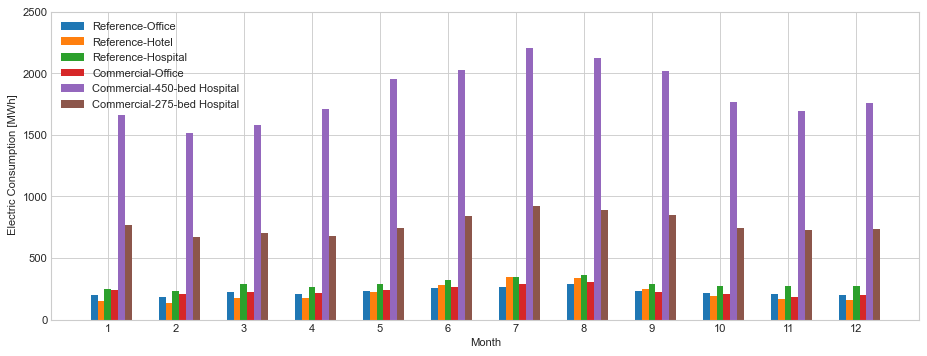

In [62]:
figure = plt.figure(num=None, figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
x = groupped_by_month_electric_loads_df_in_kilowatts.index - 0.2
for column in groupped_by_month_electric_loads_df_in_megawatts.columns:
    plt.bar(x=x, height=groupped_by_month_electric_loads_df_in_megawatts[column], label=column, width=0.1)
    plt.legend()
    plt.xlabel('Month')
    plt.ylabel(' Electric Consumption [MWh]')
    plt.ylim(0, 2500)
    plt.xticks(np.arange(1, 13))
    x = x + 0.1

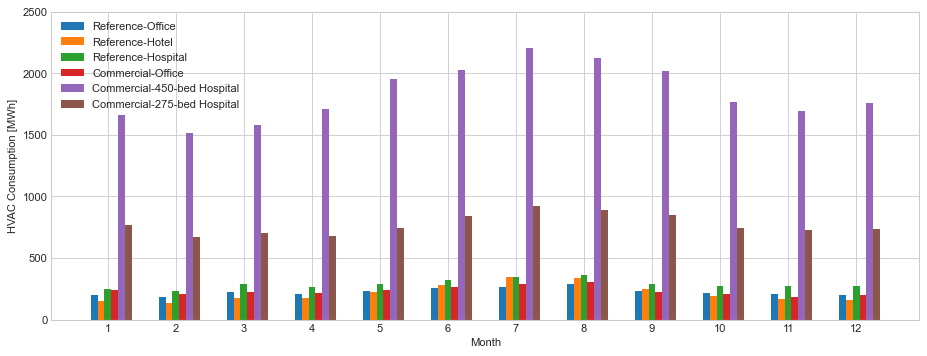

In [63]:
figure = plt.figure(num=None, figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
x = groupped_by_month_hvac_loads_df_in_megawatts.index - 0.2
for column in groupped_by_month_hvac_loads_df_in_megawatts.columns:
    plt.bar(x=x, height=groupped_by_month_hvac_loads_df_in_megawatts[column], label=column, width=0.1)
    plt.legend()
    plt.xlabel('Month')
    plt.ylabel('HVAC Consumption [MWh]')
    plt.ylim(0, 2500)
    plt.xticks(np.arange(1, 13))
    x = x + 0.1

## 6. Outside temperature

In [64]:
january_ambient_temperature_in_degree_celsius = data.ambient_temperature_in_degree_celsius[0]
june_ambient_temperature_in_degree_celsius = data.ambient_temperature_in_degree_celsius[5] 

In [65]:
np.array(january_ambient_temperature_in_degree_celsius).max()

8.491554806647743

In [66]:
np.array(january_ambient_temperature_in_degree_celsius).min()

-7.301875982806706

In [67]:
np.array(january_ambient_temperature_in_degree_celsius).mean()

-1.5194444444444446

In [68]:
np.array(june_ambient_temperature_in_degree_celsius).max()

35.753793950522635

In [69]:
np.array(june_ambient_temperature_in_degree_celsius).mean()

26.612499999999997

In [70]:
np.array(june_ambient_temperature_in_degree_celsius).min()

15.973647146810308

In [71]:
hours_per_day = 24
data_length = len(january_ambient_temperature_in_degree_celsius)
resolution = hours_per_day / data_length 
hours_per_resolution = np.arange(start=0, stop=hours_per_day, step=resolution)

In [72]:
max_inside_temperature_in_degree_celsius = np.full(data_length, 25)
min_inside_temperature_in_degree_celsius = np.full(data_length, 21)

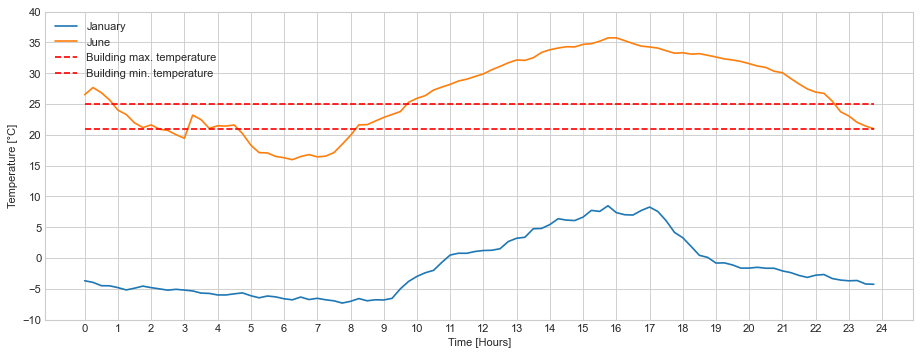

In [73]:
figure = plt.figure(num=None, figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(hours_per_resolution, january_ambient_temperature_in_degree_celsius, label='January')
plt.plot(hours_per_resolution, june_ambient_temperature_in_degree_celsius, label='June')
plt.plot(hours_per_resolution, max_inside_temperature_in_degree_celsius, label='Building max. temperature', color='red',
        linestyle='--')
plt.plot(hours_per_resolution, min_inside_temperature_in_degree_celsius, label='Building min. temperature', color='red', 
         linestyle='--')
plt.xlabel('Time [Hours]')
plt.ylabel('Temperature [°C]')
plt.legend()
plt.xticks(np.arange(0, 25))
plt.yticks(np.arange(start=-10, stop=45, step=5));

In [74]:
np.array(june_ambient_temperature_in_degree_celsius).max() - 25

10.753793950522635

In [75]:
21 - np.array(january_ambient_temperature_in_degree_celsius).min()

28.301875982806706

## 7. PV profile plot

In [76]:
cases_file_path = 'C:/python/personal/my-open/data/cases'
yaml_files = os.listdir(cases_file_path)
yaml_files

['01.yaml',
 '02.yaml',
 '03.yaml',
 '04.yaml',
 '05.yaml',
 '06.yaml',
 '07.yaml',
 '08.yaml',
 '09.yaml',
 '10.yaml',
 '11.yaml',
 '12.yaml',
 'uk_summer_no_flexibility.yaml',
 'uk_winter_no_flexibility.yaml']

In [77]:
yaml_files = yaml_files[0: 12]
yaml_files

['01.yaml',
 '02.yaml',
 '03.yaml',
 '04.yaml',
 '05.yaml',
 '06.yaml',
 '07.yaml',
 '08.yaml',
 '09.yaml',
 '10.yaml',
 '11.yaml',
 '12.yaml']

In [78]:
def read_case_data_from_yaml_file(cases_file_path: str, file_name: str) -> dict:
    with open(os.path.join(cases_file_path, file_name)) as file:
        case = yaml.safe_load(file)
    return case

In [79]:
photovoltaic_generation_data_file_paths = [read_case_data_from_yaml_file(cases_file_path=cases_file_path, file_name=yaml_file)['photovoltaic_generation_data_file_path'] for yaml_file in yaml_files]

In [80]:
photovoltaic_generation_data_file_paths

['data/solar_radiation/pamplona/1_min/2022-01-01_pamplona.csv',
 'data/solar_radiation/pamplona/1_min/2022-01-02_pamplona.csv',
 'data/solar_radiation/pamplona/1_min/2022-01-03_pamplona.csv',
 'data/solar_radiation/pamplona/1_min/2022-01-04_pamplona.csv',
 'data/solar_radiation/pamplona/1_min/2022-01-05_pamplona.csv',
 'data/solar_radiation/pamplona/1_min/2022-01-06_pamplona.csv',
 'data/solar_radiation/pamplona/1_min/2021-01-07_pamplona.csv',
 'data/solar_radiation/pamplona/1_min/2021-01-08_pamplona.csv',
 'data/solar_radiation/pamplona/1_min/2021-01-09_pamplona.csv',
 'data/solar_radiation/pamplona/1_min/2021-01-10_pamplona.csv',
 'data/solar_radiation/pamplona/1_min/2021-01-11_pamplona.csv',
 'data/solar_radiation/pamplona/1_min/2021-01-12_pamplona.csv']

In [81]:
project_path = 'C:/python/personal/my-open'
photovoltaic_profile = []
for photovoltaic_generation_data_file_path in photovoltaic_generation_data_file_paths:
    photoltaic_values = pd.read_csv(f'{project_path}/{photovoltaic_generation_data_file_path}', index_col=0, parse_dates=True)
    photovoltaic_profile.append(photoltaic_values)

In [82]:
photovoltaic_profile_df = pd.concat(photovoltaic_profile, axis=1)

In [83]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for column_index in np.arange(0, len(photovoltaic_profile_df.columns)):
    photovoltaic_profile_df.columns.values[column_index] = months[column_index]

In [84]:
photovoltaic_profile_df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


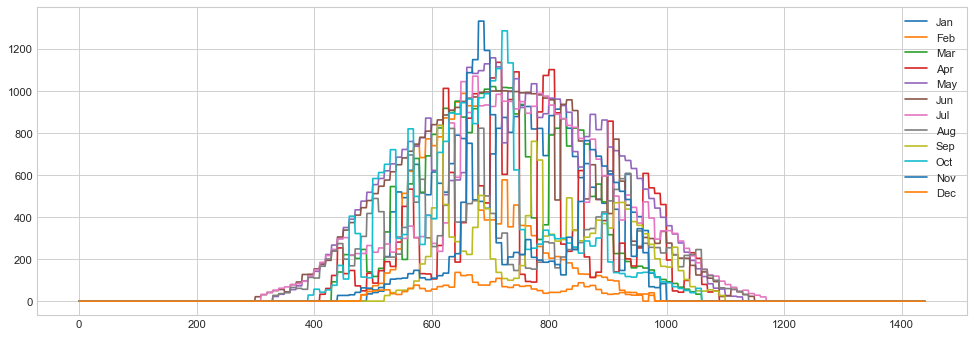

In [85]:
figure = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
for column in photovoltaic_profile_df.columns:
    plt.plot(photovoltaic_profile_df[column], label=column)
    plt.legend()

In [86]:
photovoltaic_profile_df[['Jan', 'Mar', 'Jun', 'Oct']]

,Jan,Mar,Jun,Oct
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
1435,0.0,0.0,0.0,0.0
1436,0.0,0.0,0.0,0.0
1437,0.0,0.0,0.0,0.0
1438,0.0,0.0,0.0,0.0


In [87]:
length = len(photovoltaic_profile_df['Jan'])
hours_per_day = 24
resolution = hours_per_day / length
hours = np.arange(0, 24, resolution)

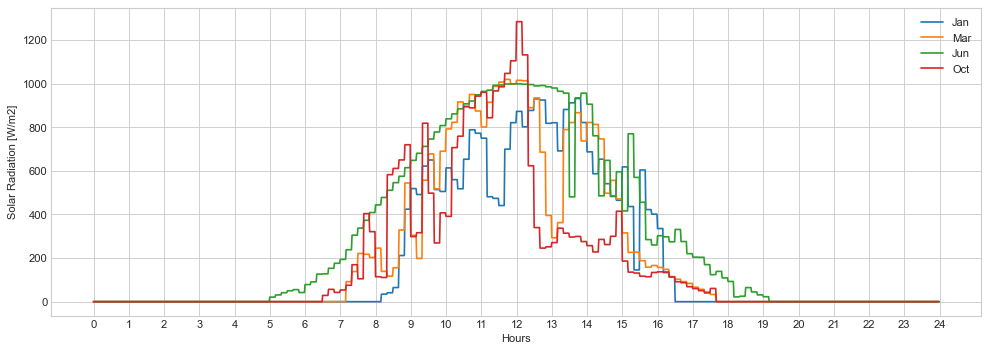

In [88]:
months = ['Jan', 'Mar', 'Jun', 'Oct']
figure = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
for column in months:
    plt.plot(hours, photovoltaic_profile_df[column], label=column)
    plt.xticks(np.arange(0, 25, 1))
    plt.legend()
    plt.xlabel('Hours')
    plt.ylabel('Solar Radiation [W/m2]')

## 8. Imports and Exports

### 8.1. Multiple cases, and 2 months (Jan and Jun)

In [89]:
january_data = data[data.Month =='January']
june_data = data[data.Month == 'June']

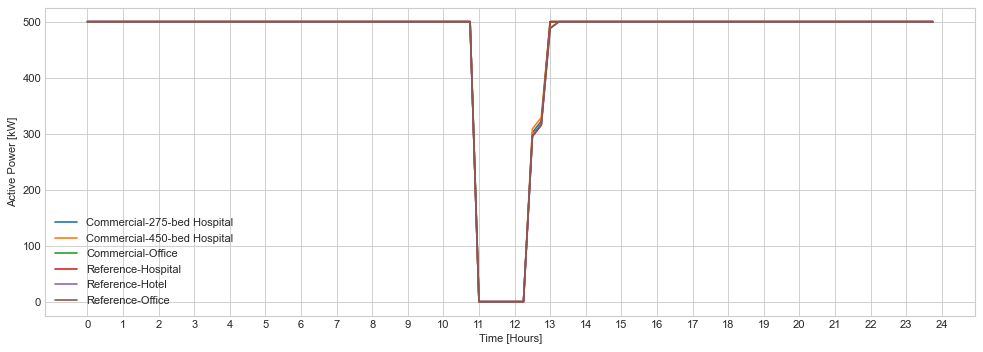

In [90]:
figure = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
for index, row in january_data.iterrows():
    plt.plot(hours_per_resolution, np.array(row.imported_active_power_in_kilowatts).flatten(), label=row.Case)
    plt.xlabel('Time [Hours]')
    plt.ylabel('Active Power [kW]')
    plt.legend()
    plt.xticks(np.arange(0, 25))
    

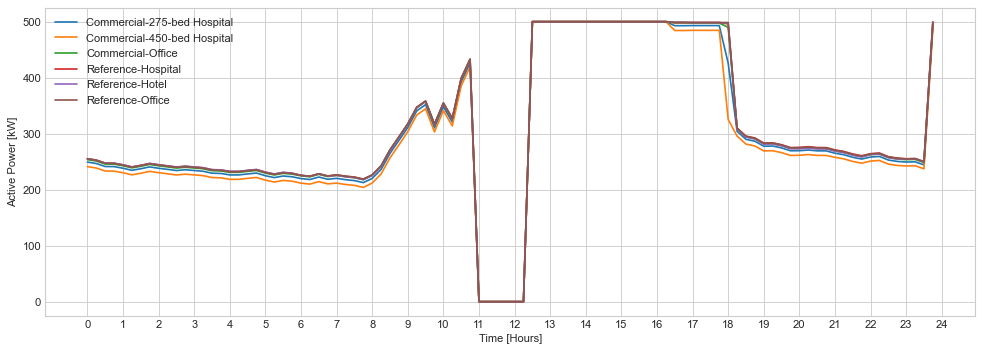

In [91]:
figure = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
for index, row in january_data.iterrows():
    case_name = row.FolderName.split('_')[-1]
    plt.plot(hours_per_resolution, np.array(row.exported_active_power_in_kilowatts).flatten(), label=row.Case)
    plt.xlabel('Time [Hours]')
    plt.ylabel('Active Power [kW]')
    plt.legend()
    plt.xticks(np.arange(0, 25))
    

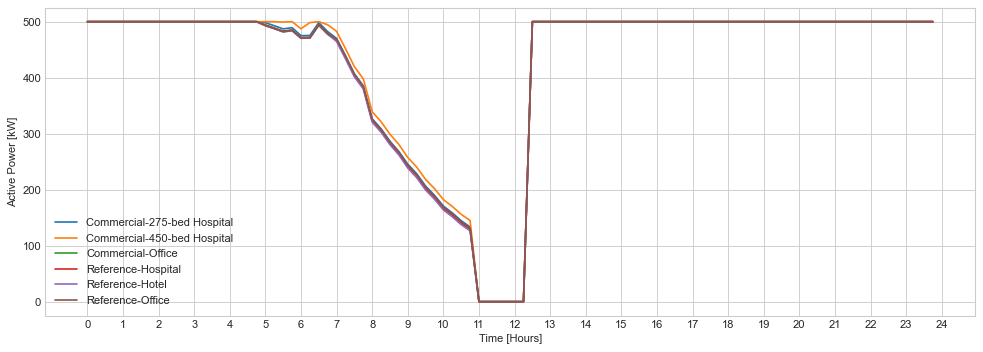

In [92]:
figure = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
for index, row in june_data.iterrows():
    case_name = row.FolderName.split('_')[-1]
    plt.plot(hours_per_resolution, np.array(row.imported_active_power_in_kilowatts).flatten(), label=row.Case)
    plt.xlabel('Time [Hours]')
    plt.ylabel('Active Power [kW]')
    plt.legend()
    plt.xticks(np.arange(0, 25))
    

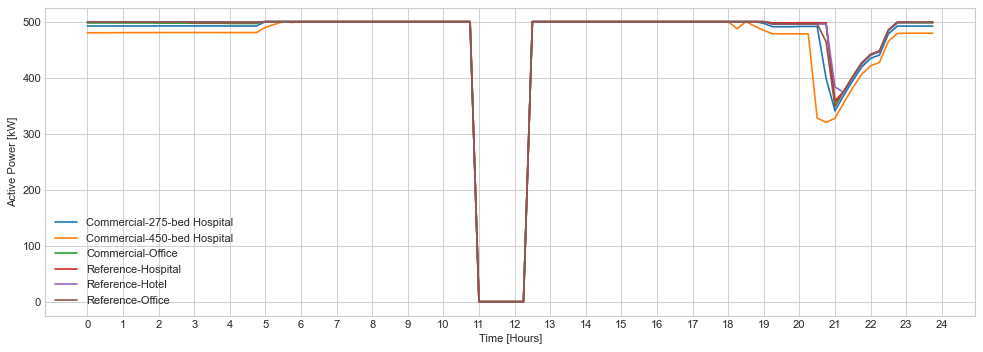

In [93]:
figure = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
for index, row in june_data.iterrows():
    case_name = row.FolderName.split('_')[-1]
    plt.plot(hours_per_resolution, np.array(row.exported_active_power_in_kilowatts).flatten(), label=row.Case)
    plt.xlabel('Time [Hours]')
    plt.ylabel('Active Power [kW]')
    plt.legend()
    plt.xticks(np.arange(0, 25))
    

### 8.2. One case and all the months

In [94]:
commercial_450_bed_hospital = data[data.Case == 'Commercial-450-bed Hospital']

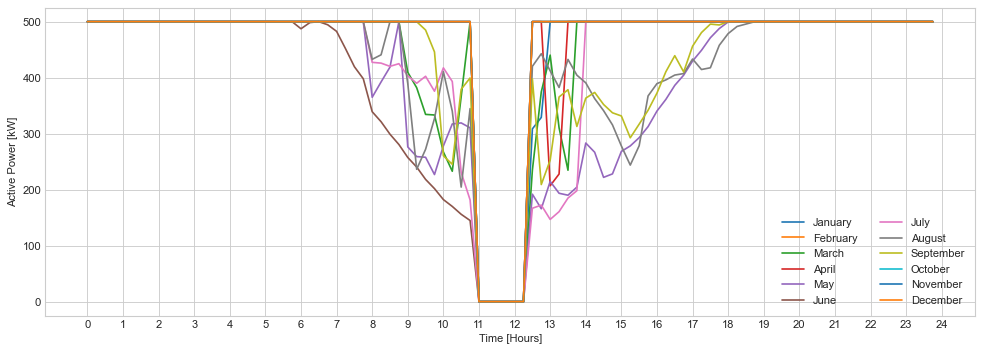

In [95]:
figure = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
for index, row in commercial_450_bed_hospital.iterrows():
    case_name = row.FolderName.split('_')[-1]
    plt.plot(hours_per_resolution, np.array(row.imported_active_power_in_kilowatts).flatten(), label=row.Month)
    plt.xlabel('Time [Hours]')
    plt.ylabel('Active Power [kW]')
    plt.legend(loc='lower right', ncol=2)
    plt.xticks(np.arange(0, 25))
    

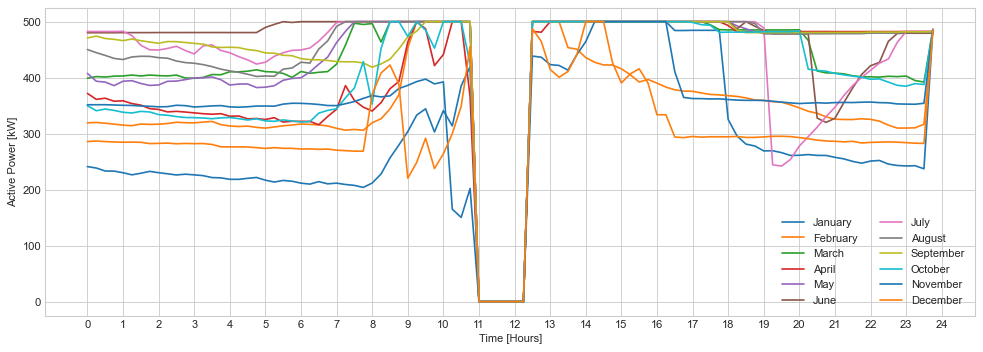

In [96]:
figure = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
for index, row in commercial_450_bed_hospital.iterrows():
    case_name = row.FolderName.split('_')[-1]
    plt.plot(hours_per_resolution, np.array(row.exported_active_power_in_kilowatts).flatten(), label=row.Month)
    plt.xlabel('Time [Hours]')
    plt.ylabel('Active Power [kW]')
    plt.legend(loc='lower right', ncol=2)
    plt.xticks(np.arange(0, 25))
    

### 8.3. One case and 4 months

In [97]:
commercial_450_bed_hospital_4_months = commercial_450_bed_hospital[commercial_450_bed_hospital.Month.isin(['January', 'March', 'June', 'October'])]

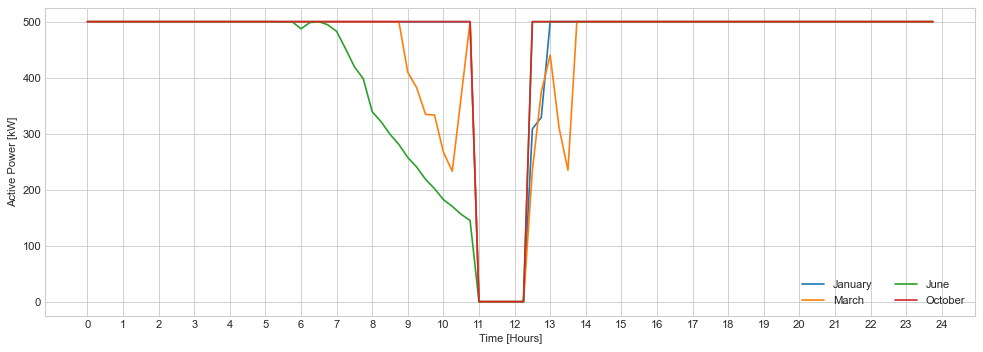

In [98]:
figure = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
for index, row in commercial_450_bed_hospital_4_months.iterrows():
    case_name = row.FolderName.split('_')[-1]
    plt.plot(hours_per_resolution, np.array(row.imported_active_power_in_kilowatts).flatten(), label=row.Month)
    plt.xlabel('Time [Hours]')
    plt.ylabel('Active Power [kW]')
    plt.legend(loc='lower right', ncol=2)
    plt.xticks(np.arange(0, 25))
    

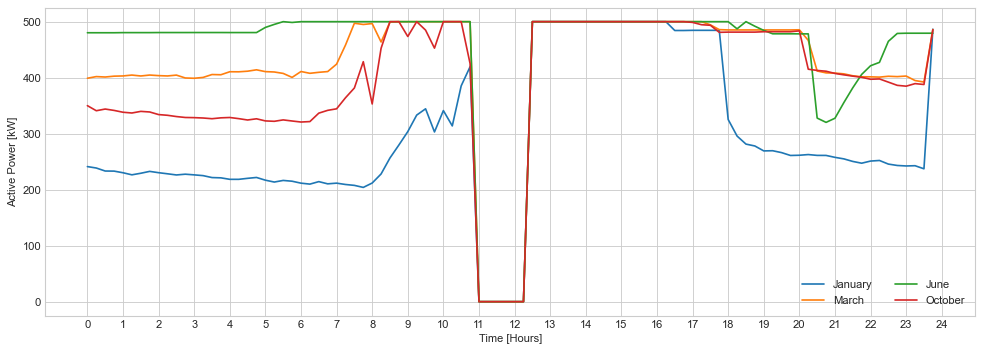

In [99]:
figure = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
for index, row in commercial_450_bed_hospital_4_months.iterrows():
    case_name = row.FolderName.split('_')[-1]
    plt.plot(hours_per_resolution, np.array(row.exported_active_power_in_kilowatts).flatten(), label=row.Month)
    plt.xlabel('Time [Hours]')
    plt.ylabel('Active Power [kW]')
    plt.legend(loc='lower right', ncol=2)
    plt.xticks(np.arange(0, 25))
    

# 9. Building internal temperature

In [100]:
# data.columns
# building_internal_temperature_in_celsius_degrees
# max_inside_degree_celsius
# min_inside_degree_celsius

In [101]:
jan_commercial_450_bed_hospital = commercial_450_bed_hospital[commercial_450_bed_hospital.Month == 'January']
jun_commercial_450_bed_hospital = commercial_450_bed_hospital[commercial_450_bed_hospital.Month == 'June']

In [102]:
jan_internal_temperature = np.array(jan_commercial_450_bed_hospital.building_internal_temperature_in_celsius_degrees.values[0])
jan_ambient_temperature = np.array(jan_commercial_450_bed_hospital.ambient_temperature_in_degree_celsius.values[0])


jun_internal_temperature = np.array(jun_commercial_450_bed_hospital.building_internal_temperature_in_celsius_degrees.values[0])
jun_ambient_temperature = np.array(jun_commercial_450_bed_hospital.ambient_temperature_in_degree_celsius.values[0])


max_temperature = np.full(jan_internal_temperature.shape, jan_commercial_450_bed_hospital.max_inside_degree_celsius)
min_temperature = np.full(jan_internal_temperature.shape, jan_commercial_450_bed_hospital.min_inside_degree_celsius)


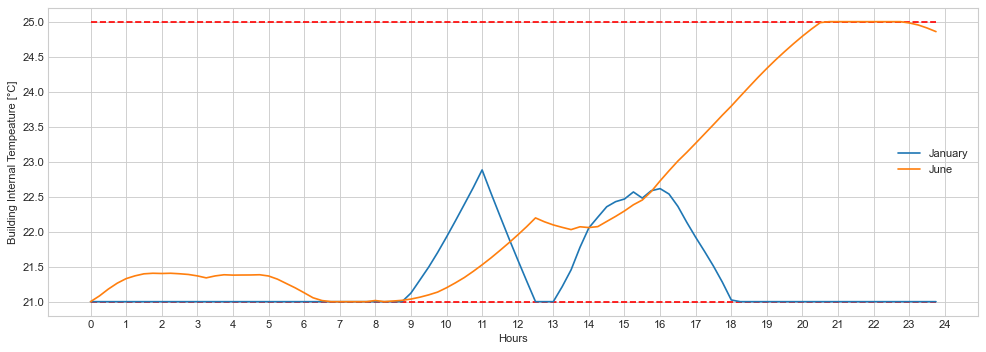

In [103]:
figure = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(hours_per_resolution, max_temperature, color='red', linestyle='dashed')
plt.plot(hours_per_resolution, min_temperature, color='red', linestyle='dashed')
plt.plot(hours_per_resolution, jan_internal_temperature, label='January')
plt.plot(hours_per_resolution, jun_internal_temperature, label='June')
plt.xticks(np.arange(0, 25, 1))
plt.xlabel('Hours')
plt.ylabel('Building Internal Tempeature [°C]')
plt.legend();


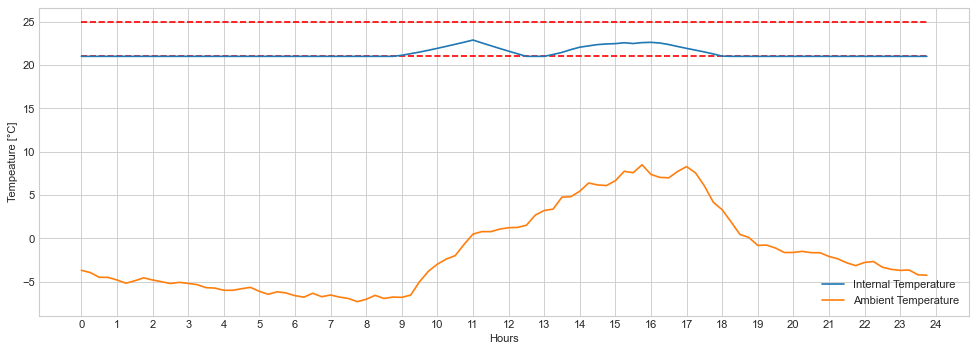

In [104]:
figure = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(hours_per_resolution, max_temperature, color='red', linestyle='dashed')
plt.plot(hours_per_resolution, min_temperature, color='red', linestyle='dashed')
plt.plot(hours_per_resolution, jan_internal_temperature, label='Internal Temperature')
plt.plot(hours_per_resolution, jan_ambient_temperature, label='Ambient Temperature')
plt.xticks(np.arange(0, 25, 1))
plt.xlabel('Hours')
plt.ylabel('Tempeature [°C]')
plt.legend();


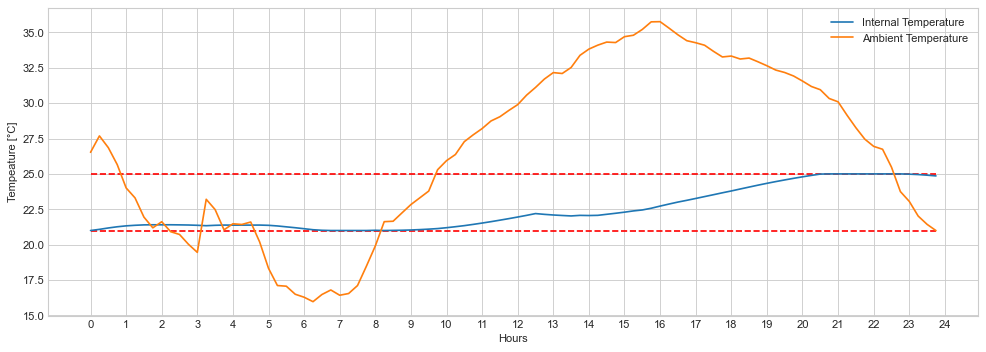

In [105]:
figure = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(hours_per_resolution, max_temperature, color='red', linestyle='dashed')
plt.plot(hours_per_resolution, min_temperature, color='red', linestyle='dashed')
plt.plot(hours_per_resolution, jun_internal_temperature, label='Internal Temperature')
plt.plot(hours_per_resolution, jun_ambient_temperature, label='Ambient Temperature')
plt.xticks(np.arange(0, 25, 1))
plt.xlabel('Hours')
plt.ylabel('Tempeature [°C]')
plt.legend();


# 10. HVAC consumption

In [106]:
commercial_450_bed_hospital.columns

Index(['FolderName', 'rated_photovoltaic_kilowatts',
       'simulation_time_series_resolution_in_minutes',
       'energy_management_system_time_series_resolution_in_minutes',
       'max_storage_asset_energy_in_kilowatt_hour',
       'min_storage_asset_energy_in_kilowatt_hour',
       'max_storage_asset_active_power_in_kilowatts',
       'min_storage_asset_active_power_in_kilowatts',
       'initial_storage_asset_energy_level_percentage',
       'required_storage_asset_terminal_energy_level_percentage',
       'storage_asset_absolute_active_power_in_kilowatts',
       'storage_asset_degradation_ratio_in_euros_per_kilowatt_hour',
       'storage_asset_charging_efficiency_percentage',
       'storage_asset_charging_efficiency_for_the_optimizer_percentage',
       'max_inside_degree_celsius', 'min_inside_degree_celsius',
       'initial_inside_degree_celsius',
       'max_consumed_electric_heating_kilowatts',
       'max_consumed_electric_cooling_kilowatts',
       'heat_pump_coefficien

In [107]:
jan_hvac_consumption_in_kilowatts = np.array(jan_commercial_450_bed_hospital.hvac_active_power_in_kilowatts.values[0])

jun_hvac_consumption_in_kilowatts = np.array(jun_commercial_450_bed_hospital.hvac_active_power_in_kilowatts.values[0])


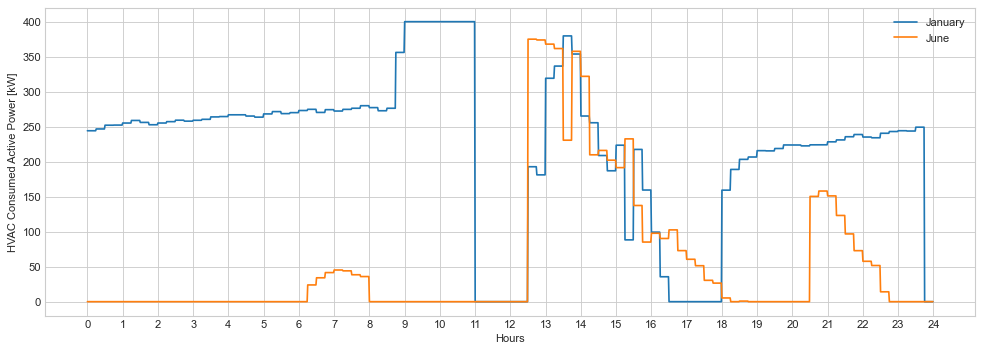

In [108]:
figure = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(hours, jan_hvac_consumption_in_kilowatts, label='January')
plt.plot(hours, jun_hvac_consumption_in_kilowatts, label='June')

plt.xlabel('Hours')
plt.ylabel('HVAC Consumed Active Power [kW]')
plt.legend()
plt.xticks(np.arange(0, 25, 1));

In [109]:
jan_hvac_consumption_in_kilowatts = np.array(jan_commercial_450_bed_hospital.hvac_active_power_in_kilowatts.values[0])

jun_hvac_consumption_in_kilowatts = np.array(jun_commercial_450_bed_hospital.hvac_active_power_in_kilowatts.values[0])


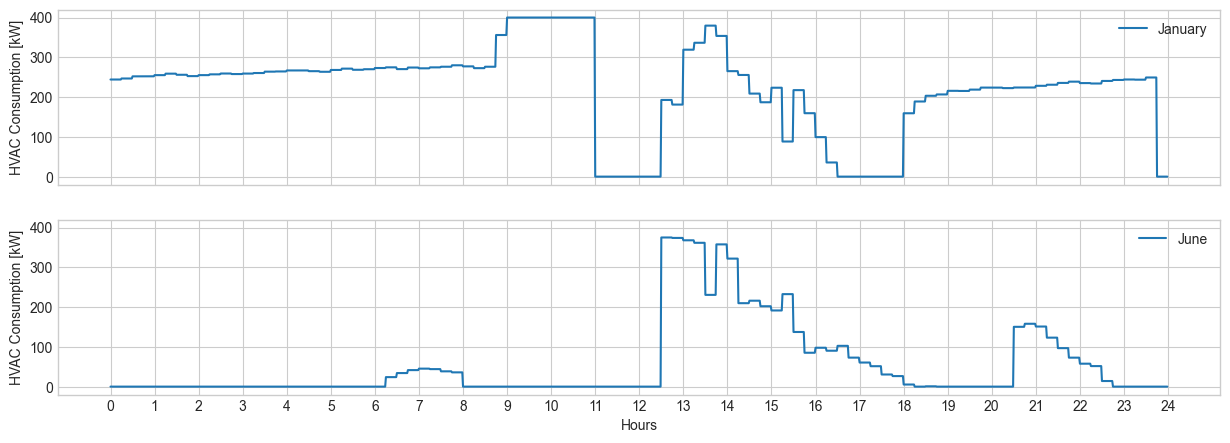

In [110]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(15, 5))

ax0.plot(hours, jan_hvac_consumption_in_kilowatts, label='January')
ax0.set_xticks (np.arange(0, 25, 1))
ax0.set_ylabel('HVAC Consumption [kW]')
ax0.legend()

ax1.plot(hours, jun_hvac_consumption_in_kilowatts, label='June')
ax1.set_xlabel('Hours')
ax1.set_ylabel('HVAC Consumption [kW]')
ax1.legend();





# 11. Storage Asset Energy Level

In [120]:
len(data_storage_asset_energy_level_in_kilowatt_hour)

1441

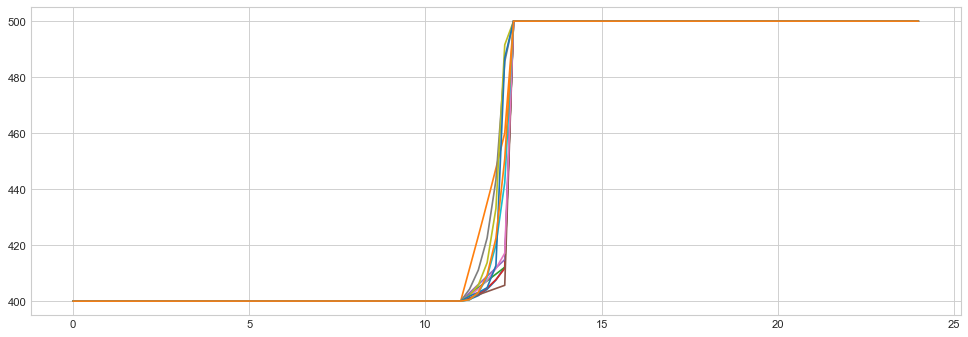

In [128]:
commercial_450_bed_hospital.shape

figure = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
for index, row in commercial_450_bed_hospital.iterrows():
    plt.plot(hours, row.storage_asset_energy_level_in_kilowatt_hour[:-1])

In [130]:
commercial_office_data = data[data.Case =='Commercial-Office']

array(['Commercial-275-bed Hospital', 'Commercial-450-bed Hospital',
       'Commercial-Office', 'Reference-Hospital', 'Reference-Hotel',
       'Reference-Office'], dtype=object)

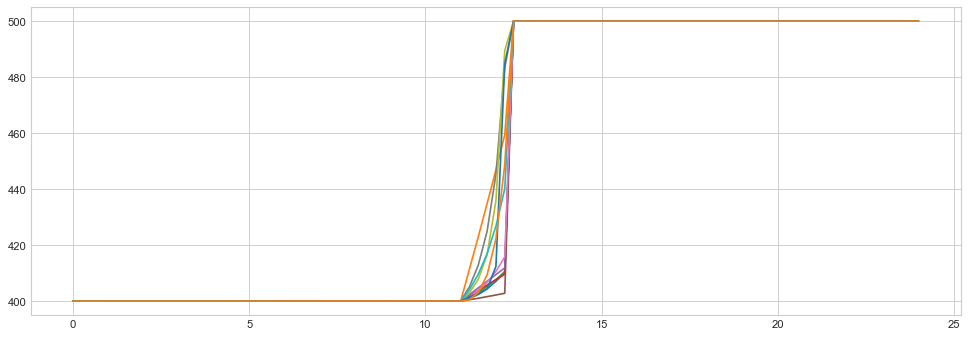

In [122]:
commercial_450_bed_hospital.shape

figure = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
for index, row in commercial_450_bed_hospital.iterrows():
    plt.plot(hours, row.storage_asset_energy_level_in_kilowatt_hour[:-1])